# Pymaceuticals Inc.
---

### Analysis

Resources Used: Class Zoom Recordings, Online Resources

A look into the summary statistic table demonstrates that the two most effective treatment regimens is Capomulin and Ramicane. These two treatments, on 
average, had the lowest tumor volume sizes meaning that they were the highly effective in reducing tumor size. In Capomulin's case, this is backed by the 
line chart showing Capomulin's Timpoint and Tumor Size. We can see that a drastic change in tumor size with continued usage. Although the line chart was for one specific case, it still demonstrates Capomulin's effectiveness as a treatment regimen. 

As for the boxplots which shows Capomulin, Ramicane, Infubinol and Ceftamin. We can again see that Capomulin and Ramincane performed well when compared with the other two treatments. However, what is interesting to note is Infubinol's outlier which shows a relatively small tumor volume. It would be interesting to single out this specific mouse as we did for l509 to see if we can gather any insight as to why this mouse's tumor reduced well.  

 As for the scatterplot and regression line, our R-value (Correlation Coefficient) is 0.84, meaning that there is a fairly strong positive relationship 
 between the Capomulin's Mouse Weight and Tumor Size. This means that as a mouse's weight increases, the tumor size increases as well. Upon this finding, we can then look into why more weight may lead to increase tumor sizes and from there, come up with ways to reduce weight & tumor size along with the Capomulin treatment. For example, how are the tumor sizes of mice affected when on the Capomulin regimen and when on a weight loss diet and/or exercise daily? 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_combined_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
#using hints from the starter code, study_results df was on the left, mouse_metadata on the right
#how="left" because we want all the rows from study_results and then add data from mouse_metadata
#on=Mouse_ID for both because that is the matching values for both dataframes
# Display the data table for preview
mouse_combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
mouse_metadata.head() #checking the dataframe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head() #checking the dataframe

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Checking the number of mice.
mouse_combined_df["Mouse ID"].nunique()
#using nunqiue to get individual/specifics mice counts, whereas .count would get me total number of observations

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mice = mouse_combined_df[mouse_combined_df.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
dupe_mice

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_combined_df.loc[mouse_combined_df["Mouse ID"]=="g989"]
#using .loc to get Mouse ID's. 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
mouse_combined_df["Mouse ID"].count() #should have 1880 after dropping duplicates or 248 nunique

1893

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mice = mouse_combined_df.loc[mouse_combined_df["Mouse ID"]!="g989"]
cleaned_mice.head()
#since we know the duplicate mouse ID, we can use .loc labeled indexing to only give us mice that were not duplicated. 
#in this case we want Mouse ID's for mice where their ID does not equal g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
cleaned_mice["Mouse ID"].count()

1880

In [10]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice["Mouse ID"].nunique()

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
#grouping by Drug Regimen on Tumor volume. We want to see tumor size stats based on what drug regimen was used
mean = cleaned_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = cleaned_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = cleaned_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdDev = cleaned_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = cleaned_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

mice_statistics = pd.DataFrame({
    "Mean Tumor Volume":mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std.Dev.": stdDev,
    "Tumor Volume Std. Err.": sem
})
mice_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#in order to reproduce code above, we need to group by drug regimen on the tumor volume 
#and then use the .agg method on the obtained summary stats, referencing our cleaned dataframe
mice_statistics_agg = cleaned_mice.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ["mean", "median","var","std","sem"]})
mice_statistics_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

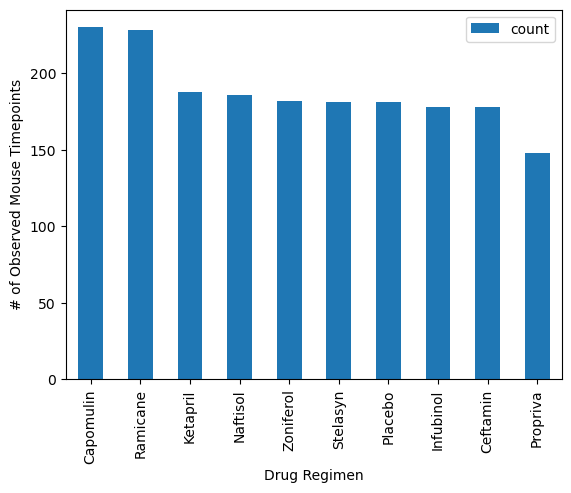

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas

#in order to do this, we need to get the counts for each drug regimen
#we can do this by creating a pandas series object (kind of like an array)
#we can then use the .to_frame method to change the series object into a pandas dataframe
counts = cleaned_mice["Drug Regimen"].value_counts()
counts_df = counts.to_frame()
counts_df
#create bar plot using counts
counts_df.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [14]:
counts_df

,count
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Infubinol,178
Ceftamin,178


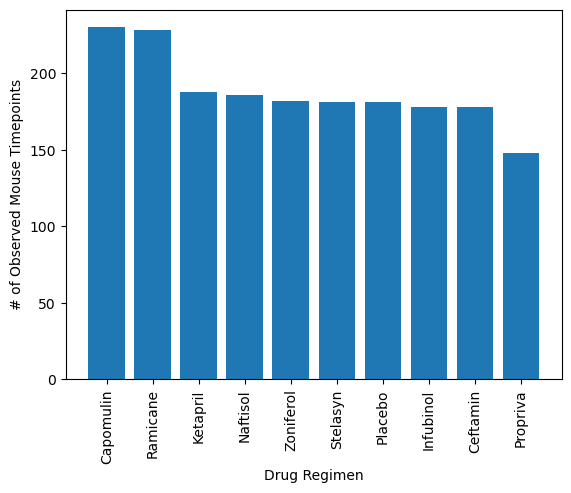

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(counts_df.index, counts_df['count'])
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

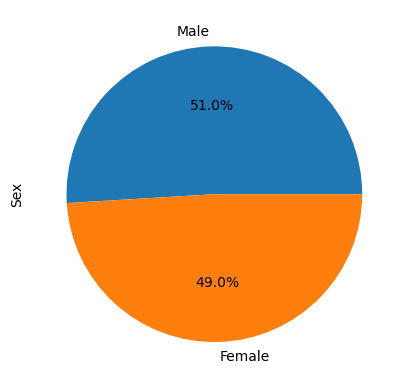

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#get the value counts of male and female mice
#create a series object
#we do not need to use to_frame here because we can directly use this series to create visualizations
mice_gender = cleaned_mice["Sex"].value_counts()


mice_gender.plot(kind="pie",autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

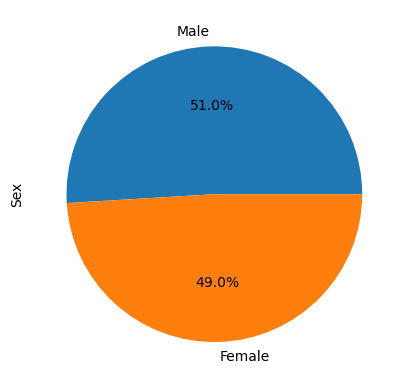

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mice_gender.index
sizes = mice_gender.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_mice.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index() #this is to make Mouse ID a column, instead of an index
#this is important to do before we merge

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df_timepoint = last_timepoint.merge(mouse_combined_df, on=["Mouse ID", "Timepoint"], how = "left")
merged_df_timepoint.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # loc (label based indexing) can be used to check where "Drug Regimen" == drug as well as their volume
    tumor_volumes = merged_df_timepoint.loc[merged_df_timepoint["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset
    tumor_vol_data.append(tumor_volumes) 
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25, .5, .75])
    q_lower = quartiles[.25]
    q_upper = quartiles[.75]
    iqr = q_upper-q_lower #middle of our data/ or 50% of it

    lower_bound = q_lower - 1.5*iqr
    upper_bound = q_upper + 1.5*iqr

    #our outliers are if the tumor volumes are less than OR greater than the bounds we created above
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)] 

    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


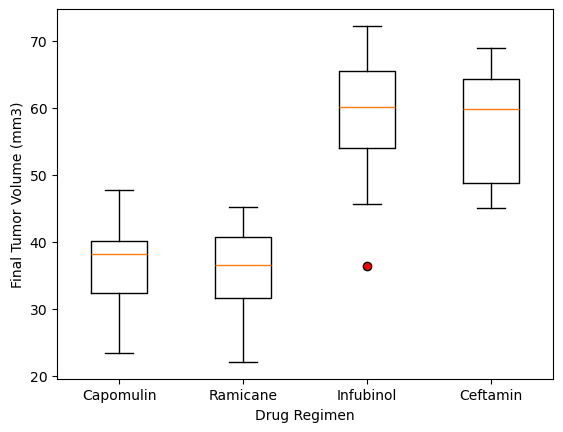

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels= treatments, flierprops=dict(marker='o', color='red', markerfacecolor='red'))
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

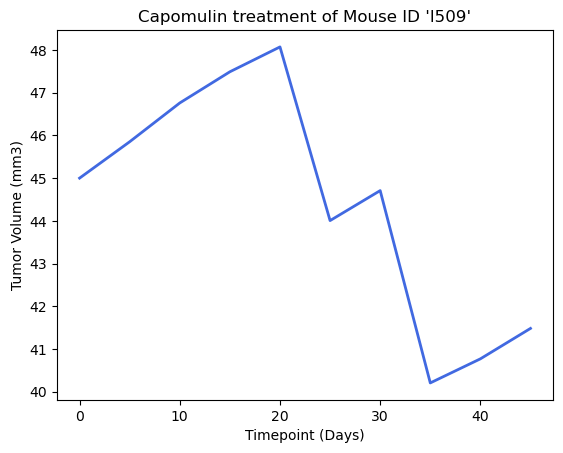

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = mouse_combined_df.loc[mouse_combined_df["Drug Regimen"] == "Capomulin"]

#getting Mouse l509 data
mouse_l509 = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509"]
mouse_l509

# Specify plot parameters
x_axis = mouse_l509["Timepoint"]
tumor_volume = mouse_l509["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title("Capomulin treatment of Mouse ID 'l509'")
plt.plot(x_axis, tumor_volume,linewidth=2,color="royalblue")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

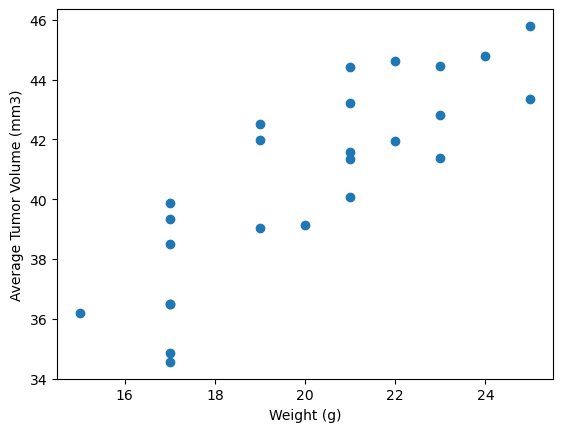

In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# filter the data for the Capomulin regimen, 
# then group the mice and aggregate using mean(average)
# how to get the mean: we can use the agg() method and pass just the mean argument on our filtered data(tumor volume & mice weight)
#remember that capomulin_df was defined last cell, and already filters for the Capomulin regimen
specific_capomulin_data = capomulin_df.groupby('Mouse ID').agg(
    Average_Tumor_Volume=('Tumor Volume (mm3)', 'mean'), #getting avg. volume on Mouse ID, for capomulin regimen
    Weight=('Weight (g)', 'mean') #getting avg. weight on Mouse ID, for Capomulin regimen
)

#plotting data
plt.scatter(specific_capomulin_data['Weight'], specific_capomulin_data['Average_Tumor_Volume'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


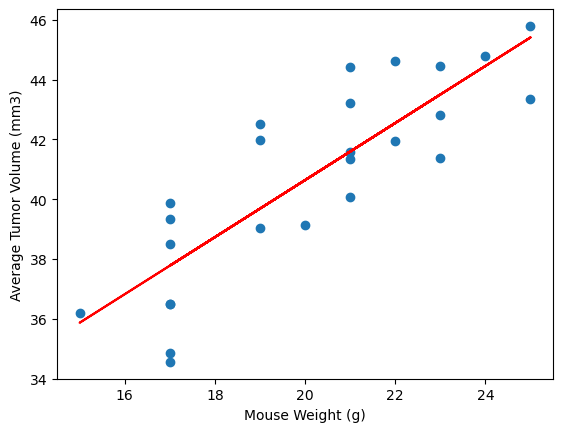

In [35]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


# our data is already aggregated/filtered, we can use the same specific_capomulin_data to plot the regression
# remember st.pearsonr is used to calculate correlation
# st.linregress used for linear regression line 

corr = st.pearsonr(specific_capomulin_data["Weight"], specific_capomulin_data["Average_Tumor_Volume"])
print(f"The correlation between mouse weight and the average tumor volume is {corr[0]:.2f}") #rounding correlation with 2 decimal points

(slope, intercept,rvalue, pvalue, stderr)= st.linregress(specific_capomulin_data["Weight"], specific_capomulin_data["Average_Tumor_Volume"])

#plotting
plt.scatter(specific_capomulin_data['Weight'], specific_capomulin_data['Average_Tumor_Volume']) 
plt.plot(specific_capomulin_data['Weight'], intercept + slope * specific_capomulin_data['Weight'], 'r') #intercept + slope * specific_capomulin_data are the regression values
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()